#Importing Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Data

In [ ]:
# Importing Data

# Order Table
sheet_url1 = 'https://docs.google.com/spreadsheets/d/1dizTASK0TN8ZoasEWjKxZSt3dklh2k2FCjx2odfxJUE/edit#gid=1252260284'
sheet_url_trf1 = sheet_url1.replace('/edit#gid=', '/export?format=csv&gid=')
df1 = pd.read_csv(sheet_url_trf1,
                  parse_dates = ['Order Date', 'Ship Date'],
                  dtype = {'Postal Code' : str})
df_od = df1.copy()

# Categories Table
sheet_url2 = 'https://docs.google.com/spreadsheets/d/1dizTASK0TN8ZoasEWjKxZSt3dklh2k2FCjx2odfxJUE/edit#gid=1702833641'
sheet_url_trf2 = sheet_url2.replace('/edit#gid=', '/export?format=csv&gid=')
df2 = pd.read_csv(sheet_url_trf2)
df_cat = df2.copy()

# Customer Table
sheet_url3 = 'https://docs.google.com/spreadsheets/d/1dizTASK0TN8ZoasEWjKxZSt3dklh2k2FCjx2odfxJUE/edit#gid=1556916558'
sheet_url_trf3 = sheet_url3.replace('/edit#gid=', '/export?format=csv&gid=')
df3 = pd.read_csv(sheet_url_trf3)
df_cus = df3.copy()

#Data Cleaning

##Data type validation

In [ ]:
table = [df_od, df_cat, df_cus]
for i in table:
  print(i.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Country      9994 non-null   object        
 7   City         9994 non-null   object        
 8   State        9994 non-null   object        
 9   Postal Code  9994 non-null   object        
 10  Region       9994 non-null   object        
 11  Product ID   9994 non-null   object        
 12  Sales        9994 non-null   float64       
 13  Quantity     9994 non-null   int64         
 14  Discount     9994 non-null   float64       
 15  Profit       9994 non-null   float64       
dtypes: dat

##Data preview

In [ ]:
table = [df_od, df_cat, df_cus]
for i in table:
  print(i.head(), '\n')

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
1       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
2       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4       7  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

         Country             City       State Postal Code Region  \
0  United States      Los Angeles  California       90036   West   
1  United States  Fort Lauderdale     Florida       33311  South   
2  United States  Fort Lauderdale     Florida       33311  South   
3  United States      Los Angeles  California       90032   West   
4  United States      Los Angeles  California       90032   West   

        Product ID     Sales  Quantity  Discount    Profit  
0  OFF-LA-10000240   14.6200         2      0.00    6.8

In [ ]:
df_od['Order Date'].agg(['min', 'max'])

min   2014-01-03
max   2017-12-30
Name: Order Date, dtype: datetime64[ns]

We only need data from 2016-2017

In [ ]:
df_od1617 = df_od[df_od['Order Date'].between('2016-01-01', '2017-12-30')]

In [ ]:
df_od1617['Order Date'].agg(['min', 'max'])

min   2016-01-02
max   2017-12-30
Name: Order Date, dtype: datetime64[ns]

##Handling Missing Value (If any)

In [ ]:
table_new = [df_od1617, df_cat, df_cus]
for i in table_new:
  print(i.isna().sum(), '\n')

Row ID         0
Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
Country        0
City           0
State          0
Postal Code    0
Region         0
Product ID     0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64 

Product ID      0
Category        0
Sub-Category    0
Product Name    0
dtype: int64 

Customer ID      0
Customer Name    0
Segment          0
dtype: int64 



##Removing duplicate data

### Order Table

In [ ]:
df_od1617.duplicated().sum()

0

There's no complete duplicate data. We have to check if any incomplete duplicate data. First, We have to check the primary key, is Order ID the primary key?

In [ ]:
df_od1617.shape

(5899, 16)

There are 5899 observations. Let's check number of unique Order ID

In [ ]:
df_od1617['Order ID'].nunique()

3002

There are only 3002 unique Order ID, so Order ID is not the primary key, maybe the primary key is the combination of Order ID and Product ID.

In [ ]:
df_od1617.sort_values('Order ID').head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Sales,Quantity,Discount,Profit
4405,4408,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-PA-10000418,314.550,3,0.0,150.9840
4404,4407,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-PA-10001622,9.080,2,0.0,4.0860
4406,4409,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-BI-10000343,4.910,1,0.0,2.3077
1891,1894,CA-2016-100083,2016-11-24,2016-11-29,Standard Class,CD-11980,United States,Medford,Oregon,97504,West,OFF-PA-10000241,24.784,1,0.2,7.7450
453,456,CA-2016-100153,2016-12-13,2016-12-17,Standard Class,KH-16630,United States,Norman,Oklahoma,73071,Central,TEC-AC-10001772,63.880,4,0.0,24.9132


We can see in the table above, there are duplicate Order ID with different Product ID. Let's check if any incomplete duplicate data based on Order ID and Product ID

In [ ]:
df_od1617.duplicated(subset=['Order ID', 'Product ID']).sum()

6

There are 6 incomplete duplicate data. Let's check thsese out!

In [ ]:
df_od1617[df_od1617.duplicated(subset=['Order ID', 'Product ID'], keep=False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Sales,Quantity,Discount,Profit
348,351,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,United States,New York City,New York,10009,East,OFF-PA-10001970,24.560,2,0.0,11.5432
350,353,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,United States,New York City,New York,10009,East,OFF-PA-10001970,49.120,4,0.0,23.0864
428,431,US-2016-123750,2016-04-15,2016-04-21,Standard Class,RB-19795,United States,Gastonia,North Carolina,28052,South,TEC-AC-10004659,408.744,7,0.2,76.6395
429,432,US-2016-123750,2016-04-15,2016-04-21,Standard Class,RB-19795,United States,Gastonia,North Carolina,28052,South,TEC-AC-10004659,291.960,5,0.2,54.7425
1298,1301,CA-2016-137043,2016-12-23,2016-12-25,Second Class,LC-17140,United States,Springfield,Virginia,22153,South,FUR-FU-10003664,572.760,6,0.0,166.1004
1299,1302,CA-2016-137043,2016-12-23,2016-12-25,Second Class,LC-17140,United States,Springfield,Virginia,22153,South,FUR-FU-10003664,286.380,3,0.0,83.0502
3181,3184,CA-2017-152912,2017-11-09,2017-11-12,Second Class,BM-11650,United States,Columbia,Maryland,21044,East,OFF-ST-10003208,1633.140,9,0.0,473.6106
3182,3185,CA-2017-152912,2017-11-09,2017-11-12,Second Class,BM-11650,United States,Columbia,Maryland,21044,East,OFF-ST-10003208,544.380,3,0.0,157.8702
7876,7882,CA-2017-118017,2017-12-03,2017-12-06,Second Class,LC-16870,United States,Thornton,Colorado,80229,West,TEC-AC-10002006,76.752,6,0.2,10.5534
7877,7883,CA-2017-118017,2017-12-03,2017-12-06,Second Class,LC-16870,United States,Thornton,Colorado,80229,West,TEC-AC-10002006,102.336,8,0.2,14.0712


They have same Order Date and Ship Date also other attributes, but different Quantity, Sales and Profit. We decide to choose the highest Quantity, Sales, and Profit.

In [ ]:
column_names = list(df_od1617.columns)
column_names.remove('Quantity')
column_names.remove('Sales')
column_names.remove('Profit')
column_names.remove('Row ID')

df_od1617_cln = df_od1617.groupby(by = column_names, as_index=False).agg({'Quantity' : 'max', 'Sales' : 'max', 'Profit' : 'max'})

df_od1617_cln

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Discount,Quantity,Sales,Profit
0,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-BI-10000343,0.0,1,4.910,2.3077
1,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-PA-10000418,0.0,3,314.550,150.9840
2,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-PA-10001622,0.0,2,9.080,4.0860
3,CA-2016-100083,2016-11-24,2016-11-29,Standard Class,CD-11980,United States,Medford,Oregon,97504,West,OFF-PA-10000241,0.2,1,24.784,7.7450
4,CA-2016-100153,2016-12-13,2016-12-17,Standard Class,KH-16630,United States,Norman,Oklahoma,73071,Central,TEC-AC-10001772,0.0,4,63.880,24.9132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,OFF-PA-10004100,0.2,3,15.552,5.4432
5889,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,OFF-ST-10004835,0.2,3,13.392,1.0044
5890,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,TEC-AC-10002018,0.2,3,16.776,4.8231
5891,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,TEC-AC-10003033,0.2,2,527.920,85.7870


Now, We have 5893 from 5899 observations after we remove 6 incomplete duplicate data

In [ ]:
df_od1617_cln.duplicated(subset=['Order ID', 'Product ID']).sum()

0

There's no incomplete duplicate data anymore

###Product Categories Table

In [ ]:
df_cat.duplicated().sum()

0

There's no complete duplicate in this table. But, We still have to check if any incomplete duplicate data. First, We have to check the primary key of this table.

In [ ]:
df_cat.head()

,Product ID,Category,Sub-Category,Product Name
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry"
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank..."
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray"


Based on this table, Product ID is primary key. So, we have to check the number of data in this table and the number of unique product ID

In [ ]:
df_cat.shape

(1894, 4)

There are 1894 number of data

In [ ]:
df_cat['Product ID'].nunique()

1862

There are 1862 number of unique Product ID. They are less than the number of data. We assume there is duplicate Product ID or Product ID that has more than 1 Product Name. Let's check this out!

In [ ]:
df_cat.duplicated(subset='Product ID').sum()

32

In [ ]:
df_cat[df_cat.duplicated(subset='Product ID', keep=False)].sort_values('Product ID')

,Product ID,Category,Sub-Category,Product Name
18,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases
19,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish"
66,FUR-CH-10001146,Furniture,Chairs,"Global Task Chair, Black"
67,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray"
185,FUR-FU-10001473,Furniture,Furnishings,DAX Wood Document Frame
...,...,...,...,...
1789,TEC-PH-10002200,Technology,Phones,Samsung Galaxy Note 2
1793,TEC-PH-10002310,Technology,Phones,Panasonic KX T7731-B Digital phone
1794,TEC-PH-10002310,Technology,Phones,Plantronics Calisto P620-M USB Wireless Speake...
1874,TEC-PH-10004531,Technology,Phones,AT&T CL2909


They have totally different Product Names. So, if We join this table with Order Table, there will be duplicate Order with different Product Name but same Sales and Profit Value. This could be invalid data, We have to check first how many number of order data that has these duplicate Product ID, if it's just a few data, We can exclude it.

In [ ]:
prod_error = list(df_cat[df_cat.duplicated(subset='Product ID')]['Product ID'].values)
prod_error

['FUR-BO-10002213',
 'FUR-CH-10001146',
 'FUR-FU-10001473',
 'FUR-FU-10004017',
 'FUR-FU-10004091',
 'FUR-FU-10004270',
 'FUR-FU-10004848',
 'FUR-FU-10004864',
 'OFF-AP-10000576',
 'OFF-AR-10001149',
 'OFF-BI-10002026',
 'OFF-BI-10004632',
 'OFF-BI-10004654',
 'OFF-PA-10000357',
 'OFF-PA-10000477',
 'OFF-PA-10000659',
 'OFF-PA-10001166',
 'OFF-PA-10001970',
 'OFF-PA-10002195',
 'OFF-PA-10002377',
 'OFF-PA-10003022',
 'OFF-ST-10001228',
 'OFF-ST-10004950',
 'TEC-AC-10002049',
 'TEC-AC-10002550',
 'TEC-AC-10003832',
 'TEC-MA-10001148',
 'TEC-PH-10001530',
 'TEC-PH-10001795',
 'TEC-PH-10002200',
 'TEC-PH-10002310',
 'TEC-PH-10004531']

In [ ]:
df_od1617_cln[df_od1617_cln['Product ID'].isin(prod_error)].shape

(206, 15)

Let's check the percentage of this error to the whole order data

In [ ]:
num_error = df_od1617_cln[df_od1617_cln['Product ID'].isin(prod_error)].shape[0]
num_data = df_od1617_cln.shape[0]

num_error / num_data * 100

3.495672832173766

It's less than 5% so we can exclude these error Product ID from Order Table and We have to communicate this problem to Data Engineer Team

In [ ]:
df_od1617_cln1 = df_od1617_cln[~ df_od1617_cln['Product ID'].isin(prod_error)]

df_od1617_cln1

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Discount,Quantity,Sales,Profit
0,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-BI-10000343,0.0,1,4.910,2.3077
1,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-PA-10000418,0.0,3,314.550,150.9840
2,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-PA-10001622,0.0,2,9.080,4.0860
3,CA-2016-100083,2016-11-24,2016-11-29,Standard Class,CD-11980,United States,Medford,Oregon,97504,West,OFF-PA-10000241,0.2,1,24.784,7.7450
4,CA-2016-100153,2016-12-13,2016-12-17,Standard Class,KH-16630,United States,Norman,Oklahoma,73071,Central,TEC-AC-10001772,0.0,4,63.880,24.9132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,OFF-PA-10004100,0.2,3,15.552,5.4432
5889,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,OFF-ST-10004835,0.2,3,13.392,1.0044
5890,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,TEC-AC-10002018,0.2,3,16.776,4.8231
5891,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,TEC-AC-10003033,0.2,2,527.920,85.7870


In [ ]:
5893 - 206

5687

Now, We have 5687 number of data, after excluding 206 data from 5893 data

###Customer Table

In [ ]:
df_cus.duplicated().sum()

0

In [ ]:
df_cus.head()

,Customer ID,Customer Name,Segment
0,AB-10015,Aaron Bergman,Consumer
1,AH-10030,Aaron Hawkins,Corporate
2,AS-10045,Aaron Smayling,Corporate
3,AB-10060,Adam Bellavance,Home Office
4,AH-10075,Adam Hart,Corporate


In [ ]:
df_cus.shape

(793, 3)

In [ ]:
df_cus['Customer ID'].nunique()

793

There's no duplicate data in customer table

##Checking if any typo

###Order Table

In [ ]:
df_od1617_cln1.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Discount,Quantity,Sales,Profit
0,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-BI-10000343,0.0,1,4.910,2.3077
1,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-PA-10000418,0.0,3,314.550,150.9840
2,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-PA-10001622,0.0,2,9.080,4.0860
3,CA-2016-100083,2016-11-24,2016-11-29,Standard Class,CD-11980,United States,Medford,Oregon,97504,West,OFF-PA-10000241,0.2,1,24.784,7.7450
4,CA-2016-100153,2016-12-13,2016-12-17,Standard Class,KH-16630,United States,Norman,Oklahoma,73071,Central,TEC-AC-10001772,0.0,4,63.880,24.9132


We're going to check unique values from Ship Mode, Country, City, State, and Region Columns

In [ ]:
cols = ['Ship Mode', 'Country', 'City', 'State', 'Region']
for col in cols:
  print(df_od1617_cln1[col].sort_values().unique(), '\n')

['First Class' 'Same Day' 'Second Class' 'Standard Class'] 

['United States'] 

['Aberdeen' 'Abilene' 'Akron' 'Albuquerque' 'Alexandria' 'Allentown'
 'Amarillo' 'Anaheim' 'Andover' 'Antioch' 'Apopka' 'Apple Valley'
 'Appleton' 'Arlington' 'Arlington Heights' 'Arvada' 'Asheville' 'Athens'
 'Atlanta' 'Atlantic City' 'Auburn' 'Aurora' 'Austin' 'Bakersfield'
 'Baltimore' 'Bangor' 'Beaumont' 'Bedford' 'Belleville' 'Bellevue'
 'Bellingham' 'Bethlehem' 'Bloomington' 'Boca Raton' 'Boise' 'Bolingbrook'
 'Bowling Green' 'Boynton Beach' 'Brentwood' 'Bridgeton' 'Bristol'
 'Broken Arrow' 'Broomfield' 'Brownsville' 'Bryan' 'Buffalo' 'Burlington'
 'Camarillo' 'Cambridge' 'Canton' 'Carlsbad' 'Carrollton' 'Cedar Hill'
 'Cedar Rapids' 'Chandler' 'Chapel Hill' 'Charlotte' 'Charlottesville'
 'Chattanooga' 'Chesapeake' 'Chester' 'Cheyenne' 'Chicago' 'Chico'
 'Chula Vista' 'Cincinnati' 'Citrus Heights' 'Clarksville' 'Cleveland'
 'Clinton' 'Clovis' 'Coachella' 'College Station' 'Colorado Springs'
 'Columbia

There's typo in Region column -> Southn should be South. Let's fix this!

In [ ]:
df_od1617_cln2 = df_od1617_cln1.copy()
df_od1617_cln2['Region'] = df_od1617_cln2['Region'].replace('Southn', 'South')
df_od1617_cln2['Region'].unique()

array(['Central', 'West', 'South', 'East'], dtype=object)

###Product Categories Table

In [ ]:
df_cat.head()

,Product ID,Category,Sub-Category,Product Name
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry"
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank..."
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray"


We're going to check if any typo in Category and Sub-category columns

In [ ]:
cat_cols = ['Category', 'Sub-Category']
for col in cat_cols:
  print(df_cat[col].sort_values().unique(), '\n')

['Furniture' 'Office Supplies' 'Technology'] 

['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables'] 



There's no typo in this table

###Customer table

In [ ]:
df_cus.head()

,Customer ID,Customer Name,Segment
0,AB-10015,Aaron Bergman,Consumer
1,AH-10030,Aaron Hawkins,Corporate
2,AS-10045,Aaron Smayling,Corporate
3,AB-10060,Adam Bellavance,Home Office
4,AH-10075,Adam Hart,Corporate


We're going to check if any typo in segment column

In [ ]:
df_cus['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

There's no typo in this table

##Date validation

We are going to check that Ship date should be more recent than Order Date, if it's not, the data could be invalid

In [ ]:
df_od1617_cln2[df_od1617_cln2['Order Date'] > df_od1617_cln2['Ship Date']]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Discount,Quantity,Sales,Profit


There's no invalid date data

##Numeric Data Validation

*   Sales should be higher than Profit and higher than zero
*   Discount should be higher or equal to zero
*   Quantity should be higher than zero

In [ ]:
df_od1617_cln2[(df_od1617_cln2['Sales'] <= df_od1617_cln2['Profit']) | (df_od1617_cln2['Sales'] <= 0)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Discount,Quantity,Sales,Profit


In [ ]:
df_od1617_cln2[df_od1617_cln2['Discount'] < 0]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Discount,Quantity,Sales,Profit


In [ ]:
df_od1617_cln2[df_od1617_cln2['Quantity'] <= 0]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Discount,Quantity,Sales,Profit


All numeric data are valid

##Checking if any outliers

In [ ]:
df_od1617_cln2.describe()

,Discount,Quantity,Sales,Profit
count,5687.000000,5687.000000,5687.000000,5687.000000
mean,0.155959,3.781607,225.644296,29.401541
std,0.205831,2.211184,626.533679,263.090144
min,0.000000,1.000000,0.444000,-6599.978000
25%,0.000000,2.000000,17.167000,1.768950
50%,0.200000,3.000000,51.840000,8.353800
75%,0.200000,5.000000,203.720000,27.882000
max,0.800000,14.000000,17499.950000,8399.976000


Let's see the distribution of the data

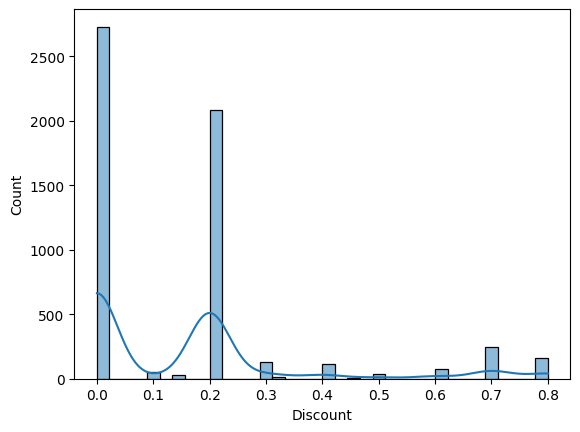

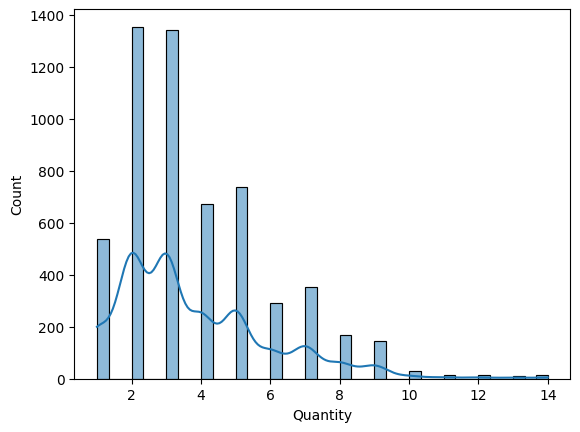

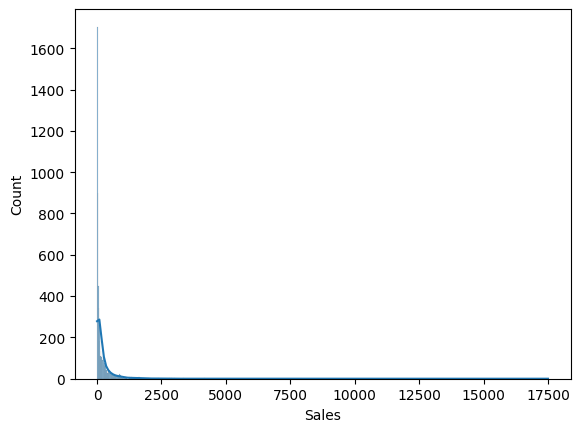

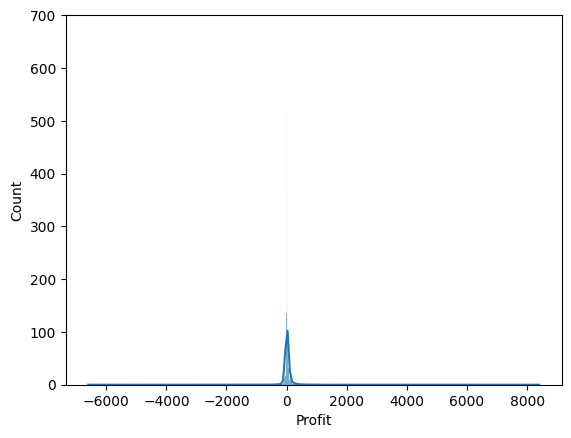

In [ ]:
for col in ['Discount', 'Quantity', 'Sales', 'Profit']:
  sns.histplot(data=df_od1617_cln2, x=col,kde=True)
  plt.show()

Let's see the box plot

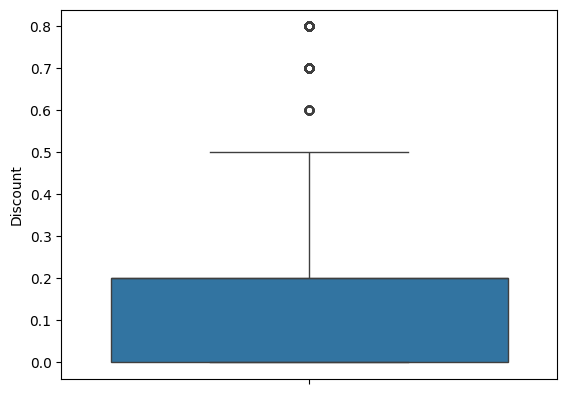

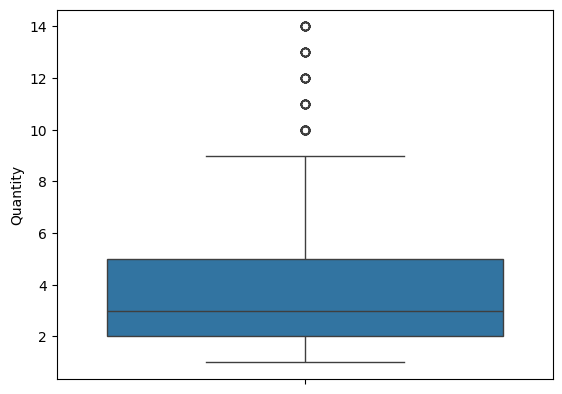

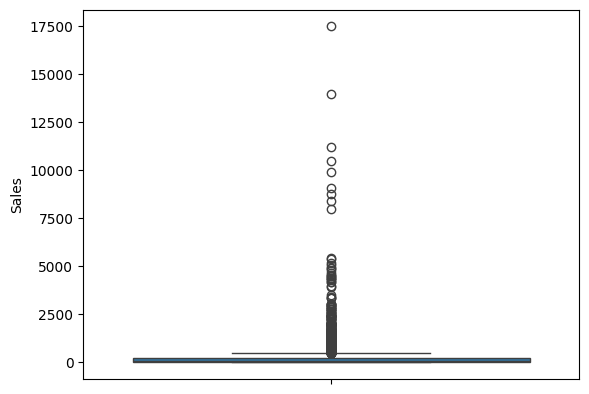

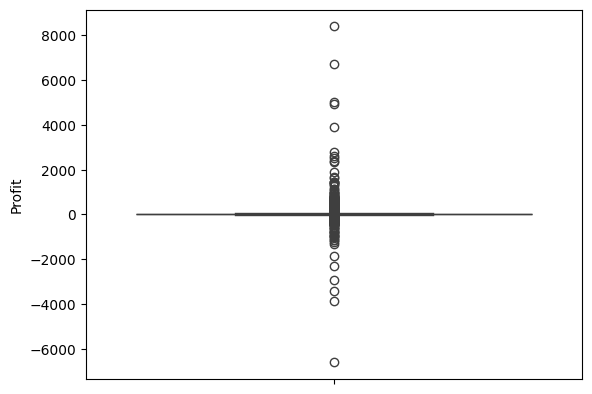

In [ ]:
for col in ['Discount', 'Quantity', 'Sales', 'Profit']:
  sns.boxplot(data=df_od1617_cln2, y=col)
  plt.show()

Let's check the data

In [ ]:
#merging the tables
df_super = df_od1617_cln2.merge(df_cat, on='Product ID', how='left') \
           .merge(df_cus, on = 'Customer ID', how = 'left')
df_super

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Discount,Quantity,Sales,Profit,Category,Sub-Category,Product Name,Customer Name,Segment
0,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-BI-10000343,0.0,1,4.910,2.3077,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",Barbara Fisher,Corporate
1,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-PA-10000418,0.0,3,314.550,150.9840,Office Supplies,Paper,Xerox 189,Barbara Fisher,Corporate
2,CA-2016-100041,2016-11-20,2016-11-25,Standard Class,BF-10975,United States,Columbus,Indiana,47201,Central,OFF-PA-10001622,0.0,2,9.080,4.0860,Office Supplies,Paper,"Ampad Poly Cover Wirebound Steno Book, 6"" x 9""...",Barbara Fisher,Corporate
3,CA-2016-100083,2016-11-24,2016-11-29,Standard Class,CD-11980,United States,Medford,Oregon,97504,West,OFF-PA-10000241,0.2,1,24.784,7.7450,Office Supplies,Paper,"IBM Multi-Purpose Copy Paper, 8 1/2 x 11"", Case",Carol Darley,Consumer
4,CA-2016-100153,2016-12-13,2016-12-17,Standard Class,KH-16630,United States,Norman,Oklahoma,73071,Central,TEC-AC-10001772,0.0,4,63.880,24.9132,Technology,Accessories,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,Ken Heidel,Corporate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,OFF-PA-10004100,0.2,3,15.552,5.4432,Office Supplies,Paper,Xerox 216,Rob Lucas,Consumer
5683,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,OFF-ST-10004835,0.2,3,13.392,1.0044,Office Supplies,Storage,Plastic Stacking Crates & Casters,Rob Lucas,Consumer
5684,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,TEC-AC-10002018,0.2,3,16.776,4.8231,Technology,Accessories,AmazonBasics 3-Button USB Wired Mouse,Rob Lucas,Consumer
5685,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,United States,Philadelphia,Pennsylvania,19120,East,TEC-AC-10003033,0.2,2,527.920,85.7870,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Rob Lucas,Consumer


In [ ]:
#outlier function
def outlier(df, col):
  first_quartile = df[col].quantile(0.25)
  third_quartile = df[col].quantile(0.75)
  IQR = third_quartile - first_quartile
  lower = first_quartile - (1.5 * IQR)
  upper = third_quartile + (1.5 * IQR)
  outliers = df[(df[col] < lower) | (df[col] > upper)]
  return outliers

In [ ]:
#column we want to check
col_check = ['Order ID', 'Order Date', 'Category', 'Sub-Category', 'Product Name', 'Segment', 'Quantity', 'Sales', 'Discount', 'Profit']

Checking outlier at Discount column

In [ ]:
disc_outlier = outlier(df_super[col_check], 'Discount')
disc_outlier.sort_values('Discount', ascending=False)

,Order ID,Order Date,Category,Sub-Category,Product Name,Segment,Quantity,Sales,Discount,Profit
4944,US-2016-141264,2016-08-13,Office Supplies,Appliances,3.6 Cubic Foot Counter Height Office Refrigerator,Consumer,1,58.924,0.8,-153.2024
2330,CA-2017-106432,2017-10-19,Office Supplies,Binders,"SlimView Poly Binder, 3/8""",Consumer,2,2.072,0.8,-3.5224
4873,US-2016-128195,2016-08-04,Office Supplies,Binders,Ibico Presentation Index for Binding Systems,Consumer,5,3.980,0.8,-6.5670
2133,CA-2017-101728,2017-08-19,Office Supplies,Binders,Binder Posts,Consumer,2,2.296,0.8,-3.9032
4812,US-2016-117037,2016-05-17,Office Supplies,Binders,"Acco Recycled 2"" Capacity Laser Printer Hangin...",Consumer,1,2.890,0.8,-4.7685
...,...,...,...,...,...,...,...,...,...,...
1274,CA-2016-144645,2016-02-02,Furniture,Furnishings,"Deflect-o RollaMat Studded, Beveled Mat for Me...",Corporate,2,73.784,0.6,-77.4732
2762,CA-2017-118640,2017-07-20,Furniture,Furnishings,"Contract Clock, 14"", Brown",Consumer,1,8.792,0.6,-5.7148
5068,US-2016-160528,2016-08-23,Furniture,Furnishings,Flat Face Poster Frame,Home Office,3,22.608,0.6,-10.1736
4566,CA-2017-166849,2017-04-20,Furniture,Furnishings,Eldon Cleatmat Chair Mats for Medium Pile Carpets,Home Office,2,44.400,0.6,-52.1700


We think that there's not something wrong with this data. Maybe it's just the clearance sale.

Checking outlier at Quantity column

In [ ]:
qty_outlier = outlier(df_super[col_check], 'Quantity')
qty_outlier.sort_values('Quantity', ascending=False)

,Order ID,Order Date,Category,Sub-Category,Product Name,Segment,Quantity,Sales,Discount,Profit
4072,CA-2017-152702,2017-10-12,Furniture,Chairs,"Global Stack Chair without Arms, Black",Home Office,14,254.604,0.3,-18.1860
4473,CA-2017-164028,2017-11-24,Technology,Accessories,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,Consumer,14,223.580,0.0,87.1962
4676,CA-2017-169859,2017-12-14,Office Supplies,Binders,Wilson Jones Clip & Carry Folder Binder Tool f...,Home Office,14,64.960,0.2,22.7360
2989,CA-2017-123491,2017-10-30,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",Consumer,14,1702.120,0.0,510.6360
1317,CA-2016-145583,2016-10-13,Furniture,Furnishings,Longer-Life Soft White Bulbs,Consumer,14,43.120,0.0,20.6976
...,...,...,...,...,...,...,...,...,...,...
2751,CA-2017-118213,2017-11-05,Office Supplies,Paper,Strathmore Photo Mount Cards,Home Office,10,67.800,0.0,31.1880
3273,CA-2017-131492,2017-10-19,Office Supplies,Labels,Avery 518,Corporate,10,31.500,0.0,15.1200
3547,CA-2017-138611,2017-11-14,Technology,Phones,PureGear Roll-On Screen Protector,Consumer,10,119.940,0.4,15.9920
3701,CA-2017-142391,2017-09-24,Furniture,Furnishings,12-1/2 Diameter Round Wall Clock,Consumer,10,199.800,0.0,71.9280


There's no something wrong in this data. The order still makes sense.

Checking outlier at Sales column

In [ ]:
sales_outlier = outlier(df_super[col_check], 'Sales')
sales_outlier.sort_values('Sales', ascending=False)

,Order ID,Order Date,Category,Sub-Category,Product Name,Segment,Quantity,Sales,Discount,Profit
545,CA-2016-118689,2016-10-02,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,Corporate,5,17499.950,0.0,8399.9760
3596,CA-2017-140151,2017-03-23,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,Consumer,4,13999.960,0.0,6719.9808
3109,CA-2017-127180,2017-10-22,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,Home Office,4,11199.968,0.2,3919.9888
4564,CA-2017-166709,2017-11-17,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,Consumer,3,10499.970,0.0,5039.9856
508,CA-2016-117121,2016-12-17,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,Consumer,13,9892.740,0.0,4946.3700
...,...,...,...,...,...,...,...,...,...,...
2310,CA-2017-105823,2017-06-22,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Home Office,2,487.960,0.0,146.3880
204,CA-2016-107328,2016-08-08,Office Supplies,Appliances,Kensington 4 Outlet MasterPiece Compact Power ...,Home Office,6,487.920,0.0,136.6176
3442,CA-2017-135419,2017-11-03,Furniture,Tables,"SAFCO PlanMaster Boards, 60w x 37-1/2d, White ...",Consumer,4,486.368,0.2,36.4776
4739,US-2016-108504,2016-02-05,Technology,Phones,Aastra 57i VoIP phone,Home Office,3,484.830,0.0,126.0558


There's no something wrong with this data. Spending a lot of money for copiers by Corporate consumer still makes sense.

Checking outlier at Profit column

In [ ]:
profit_outlier = outlier(df_super[col_check], 'Profit')
profit_outlier.sort_values('Profit', ascending=False)

,Order ID,Order Date,Category,Sub-Category,Product Name,Segment,Quantity,Sales,Discount,Profit
545,CA-2016-118689,2016-10-02,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,Corporate,5,17499.950,0.0,8399.9760
3596,CA-2017-140151,2017-03-23,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,Consumer,4,13999.960,0.0,6719.9808
4564,CA-2017-166709,2017-11-17,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,Consumer,3,10499.970,0.0,5039.9856
508,CA-2016-117121,2016-12-17,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,Consumer,13,9892.740,0.0,4946.3700
3109,CA-2017-127180,2017-10-22,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,Home Office,4,11199.968,0.2,3919.9888
...,...,...,...,...,...,...,...,...,...,...
3265,CA-2017-131254,2017-11-19,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,Consumer,6,1525.188,0.8,-2287.7820
5334,US-2017-122714,2017-12-07,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,Corporate,5,1889.990,0.8,-2929.4845
3417,CA-2017-134845,2017-04-17,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,Home Office,5,2549.985,0.7,-3399.9800
5672,US-2017-168116,2017-11-04,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,Corporate,4,7999.980,0.5,-3839.9904


There's no something wrong with this data. There are minus profit for some orders. Maybe it's the clearance sale or they sold second hand product. We think it still makes sense.

#Correlation

<ipython-input-53-c10834abe716>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_super[df_super['Order Date'].between('2017-01-01', '2017-12-30')].corr(), annot=True, cmap='coolwarm', linewidths=0.5)


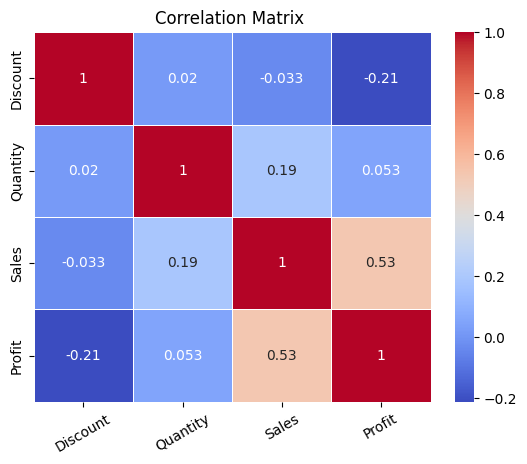

In [ ]:
sns.heatmap(df_super[df_super['Order Date'].between('2017-01-01', '2017-12-30')].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix ')
plt.xticks(rotation=30)
plt.show()

#Exporting data to CSV

In [ ]:
df_super.to_csv('superstore.csv', index=False)